# Descrição dos entregáveis do Hands-on 11


### D01:  Criar e incluir no seu repositório um arquivo chamado **Entrega_h11.ipynb** com código e texto com o seguinte conteúdo:

Faça um loopback de tranmissão e recepção OFDM similar a **Prática 3** do [Hands-on 11: Modulação OFDM (ortogonalidade, transmissão e recepção, desempenho em canal AWGN)](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004_LabPSC/blob/master/h11.ipynb) em Python com as seguintes mudanças:

1. Eb/No como variável de entrada. Variar a Eb/No de 0 a 14 dB e calcular a variância do ruído, considerando modulação 16-QAM;
2. Usar as funções ifft e fft para multiplexar (Tx) e demultiplexar (Rx);
3. Fazer o gráfico da BER vs Eb/No para com OFDM e, no mesmo gráfico, o gráfico da Pe vs Eb/No (fórmula teórica) da modulação 16-QAM sem OFDM.

Comite o arquivo **Entrega_h11.ipynb** com os códigos rodados e com os gráficos aparecendo. Se necessário, insira comentários sobre o código. As figuras devem ser resultado da execução do código e não figuras inseridas em formato png ou jpg. 


## Data da entrega: 04/12/2017

Bits Perdidos com EbNo = 0 dB:
223088 bits:
Bits Perdidos com EbNo = 1 dB:
161624 bits:
Bits Perdidos com EbNo = 2 dB:
110108 bits:
Bits Perdidos com EbNo = 3 dB:
67944 bits:
Bits Perdidos com EbNo = 4 dB:
36756 bits:
Bits Perdidos com EbNo = 5 dB:
17672 bits:
Bits Perdidos com EbNo = 6 dB:
7140 bits:
Bits Perdidos com EbNo = 7 dB:
2184 bits:
Bits Perdidos com EbNo = 8 dB:
516 bits:
Bits Perdidos com EbNo = 9 dB:
128 bits:
Bits Perdidos com EbNo = 10 dB:
12 bits:
Bits Perdidos com EbNo = 11 dB:
0 bits:
Bits Perdidos com EbNo = 12 dB:
0 bits:
Bits Perdidos com EbNo = 13 dB:
0 bits:
Bits Perdidos com EbNo = 14 dB:
0 bits:


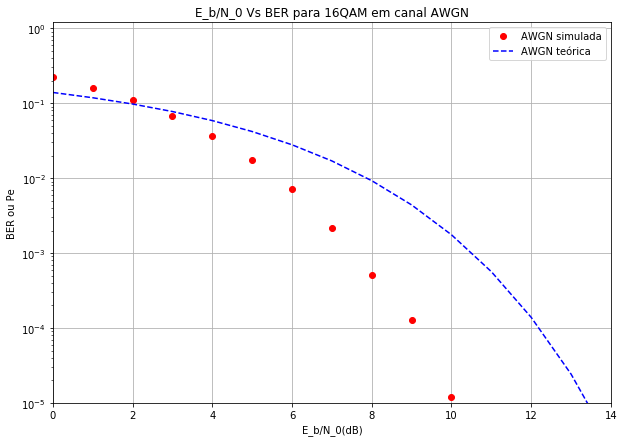

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
# Parâmetros
#N = 10**6                       # Número de símbolos BPSK a serem transmitidos
EbN0dB = np.arange(0,15,1)     # Valores EbN0 a simular
# Transmissor
#
# Inicialização de vetores de BER simulada e teórica
BER_awgn_simulada = np.zeros(len(EbN0dB))


n_bits = 1000000;                # Número de bits
T = 500000;                      # Tempo de símbolo OFDM
Ts = 2;                       # Tempo de símbolo em portadora única
K = T/Ts;                     # Número de subportadoras independentes
N = 2*K;                      # DFT de N pontos
sigmas=np.array([0.0,0.1,1.0]);             # Vetor de variâncias do ruído

# Gerar bits aleatórios
dataIn=np.random.rand(n_bits);   # Sequência de números entre 0 e 1 uniformemente distribuídos
dataIn=np.sign(dataIn-0.5);  # Sequência de -1 e 1
# Conversor serial paralelo
dataInMatrix = dataIn.reshape((int)(n_bits/4),4);
#
# Gerar constelaçao 16-QAM
seq16qam = 2*dataInMatrix[:,0]+dataInMatrix[:,1]+1j*2*dataInMatrix[:,2]+1j*dataInMatrix[:,3]; 
seq16=seq16qam.reshape((int)(n_bits/4));


X=np.concatenate([seq16,np.conjugate(seq16[::-1])])

# Garantir propriedadade da simetria
##
## Construindo xn
xn = np.zeros((int)(N),dtype=complex);
xn=(N/np.sqrt(N))*np.fft.ifft(X)
#for n in np.arange(N):
#    for k in np.arange(N):
#        xn[n] += (1/np.sqrt(N))*X[k]*np.exp(1j*2*np.pi*n*k/N);
#    end
#end
# 
# Loop de variâncias
for i in range(len(EbN0dB)):
#    #
#    # Adição de ruído
    #noise = np.sqrt(variance)*np.random.randn(N)+1j*np.sqrt(variance)*np.random.randn(N);
#    #
#    # sinal recebido = xn + ruído 
    # Ruído AWGN complexo com média 0 e variância 1 (vetor base)
    noise = 1/np.sqrt(2)*(np.random.randn((int)(N))+1j*np.random.randn((int)(N))) 
    # Vetor de ruído com potência proporcional a EbNo corrente
    n = noise*10**(-EbN0dB[i]/20)      
    rn = xn+n;
#    # DFT de rn
    Y = np.zeros((int)(K),dtype=complex);
    Y = (1/np.sqrt(N))*np.fft.fft(rn)
#    for k in np.arange(K):
#        for n in np.arange(N):
#            Y[k] += (1/np.sqrt(N))*rn[n]*np.exp(-1j*2*np.pi*k*n/N);
#        end
#    end
    #
    # Plots
    #plt.scatter(Y.real,Y.imag)

#    hold on
#    scatter(real(seq16),imag(seq16), 'r', '+')
#    hold off
#    title(['Sinal com ruído de variância ', num2str(variance)]);
#    # Demodulação  
    Z=np.zeros(len(Y),dtype=complex)
    for k in np.arange(len(Y)): # Para percorrer todo o vetor Yk 
        if Y[k].real > 0: # Para parte real de Yk positiva
            if Y[k].real > 2:
                Z[k] = 3;
            else:
                Z[k] = 1;
#            end
        else: #Para parte real de Yk negativa ou igual a zero
            if Y[k].real < -2:
                 Z[k] = -3;
            else:
                 Z[k] = -1;
#            end
#        end

        if Y[k].imag > 0: # Para parte imaginaria de Yk positiva
            if Y[k].imag > 2:
                Z[k] = Z[k] + 1j*3;
            else:
                Z[k] = Z[k] + 1j;
#            end
        else: # Para parte imaginaria de Yk negativa ou igual a zero
            if Y[k].imag < -2:
                 Z[k] = Z[k] - 1j*3;
            else:
                 Z[k] = Z[k] - 1j;
#            end
#        end
#    end
#    # Contagem de erro
    error = np.sum(Z[2:(int)(K)]!=X[2:(int)(K)]);
    BER_awgn_simulada[i]=error*4;
    print("Bits Perdidos com EbNo = {} dB:".format(str(EbN0dB[i])))
    print("{} bits:".format(str(error*4)))
  

BER_awgn_simulada /= n_bits

EbN0=10**(EbN0dB/10)            # Eb/N0 em escala linear
# Implementação direta da equação de Pe para o canal somente AWGN
BER_awgn_teorica = (3/(2*4))*erfc(np.sqrt((4/10)*EbN0))
    #disp(['Para variância de ', num2str(variance), ' houve ', num2str(error), ' símbolos errados.']);
#end
# Gráficos
plt.figure(1,[10,7])
# AWGN simulado
plt.semilogy(EbN0dB,BER_awgn_simulada,'ro',label='AWGN simulada')
# AWGN teórico
plt.semilogy(EbN0dB,BER_awgn_teorica,'b--',label='AWGN teórica')
plt.grid()
plt.axis([0,14,10**(-5),1.2])
plt.legend()
plt.title("E_b/N_0 Vs BER para 16QAM em canal AWGN")
plt.xlabel('E_b/N_0(dB)')
plt.ylabel('BER ou Pe')
plt.show()